In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
import re
import string
import nltk
from nltk.corpus import stopwords
import gensim
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel
warnings.filterwarnings('ignore')

In [3]:
columns  = ["sentiment", "id", "date", "flag", "user", "text"]
df = pd.read_csv('dataset.csv',names=columns)
df.head()

sentiment          id                          date      flag  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [4]:
df.tail()

sentiment          id                          date      flag  \
1599995          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...

In [5]:
df = df[['sentiment','text']]

In [6]:
df['sentiment'] = df['sentiment'].replace(4,1) 

In [7]:
df.tail()

sentiment                                               text
1599995          1  Just woke up. Having no school is the best fee...
1599996          1  TheWDB.com - Very cool to hear old Walt interv...
1599997          1  Are you ready for your MoJo Makeover? Ask me f...
1599998          1  Happy 38th Birthday to my boo of alll time!!! ...
1599999          1  happy #charitytuesday @theNSPCC @SparksCharity...

In [8]:
df['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [10]:
text, sentiment = list(df['text']), list(df['sentiment'])

In [11]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
def clean_dataset(textdata):
    processedText=[]
    wordLemm = WordNetLemmatizer()
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-z0-9#]"
    stopwords_set = stopwords.words('english')
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        tweet = re.sub(userPattern,' USER', tweet)   
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = " ".join([i for i in tweet.split() if i not in stopwords_set])
  
   
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
        processedText.append(tweetwords)
    
    
    return processedText

In [12]:
import time
t = time.time()
processedtext = clean_dataset(text)
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 276 seconds


In [13]:
processedtext[1:5]

['upset update facebook texting might cry result school today also blah ',
 'dived many time ball managed save 50 rest go bound ',
 'whole body feel itchy like fire ',
 'behaving mad see ']

In [14]:
 #pip install wordcloud

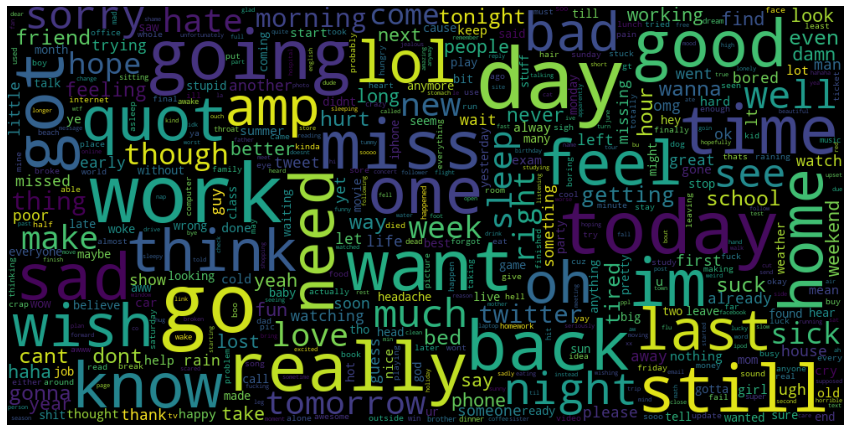

In [15]:
from wordcloud import WordCloud
data_neg = " ".join(processedtext[:800000])
plt.figure(figsize = (15,15))
wc = WordCloud(max_words=500, width=1000, height=500, max_font_size=100, collocations=False).generate(data_neg)
plt.imshow(wc)
plt.axis('off')
plt.show()

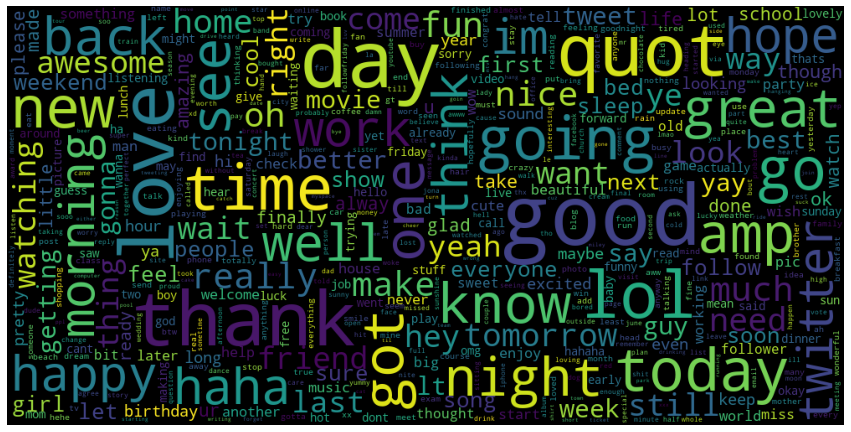

In [16]:
data_pos = " ".join(processedtext[800000:])
wc = WordCloud(max_words=500, width=1000, height=500, max_font_size=100, collocations=False).generate(data_pos)
plt.figure(figsize = (15,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [36]:
df['clean_tweet']= processedtext
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [38]:
df

sentiment                                               text  \
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1                0  is upset that he can't update his Facebook by ...   
2                0  @Kenichan I dived many times for the ball. Man...   
3                0    my whole body feels itchy and like its on fire    
4                0  @nationwideclass no, it's not behaving at all....   
...            ...                                                ...   
1599995          1  Just woke up. Having no school is the best fee...   
1599996          1  TheWDB.com - Very cool to hear old Walt interv...   
1599997          1  Are you ready for your MoJo Makeover? Ask me f...   
1599998          1  Happy 38th Birthday to my boo of alll time!!! ...   
1599999          1  happy #charitytuesday @theNSPCC @SparksCharity...   

                                               clean_tweet  
0            awww bummer shoulda got david carr third day   
1        upset update facebook texting might cry result...  
2        dived many time ball managed save 50 rest go b...  
3                         whole body feel itchy like fire   
4                                        behaving mad see   
...                                                    ...  
1599995                     woke school best feeling ever   
1599996           thewdb com cool hear old walt interview   
1599997                    ready mojo makeover ask detail   
1599998  happy 38th birthday boo alll time tupac amaru ...  
1599999                             happy #charitytuesday   

[1600000 rows x 3 columns]

In [40]:
ht_positive = hashtag_extract(df['clean_tweet'][df['sentiment']==1])

ht_negative = hashtag_extract(df['clean_tweet'][df['sentiment']==0])

In [43]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [44]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d.head()

Hashtag  Count
0    devunity      1
1       alexa      1
2       japan      5
3       skype      3
4  expletives      1

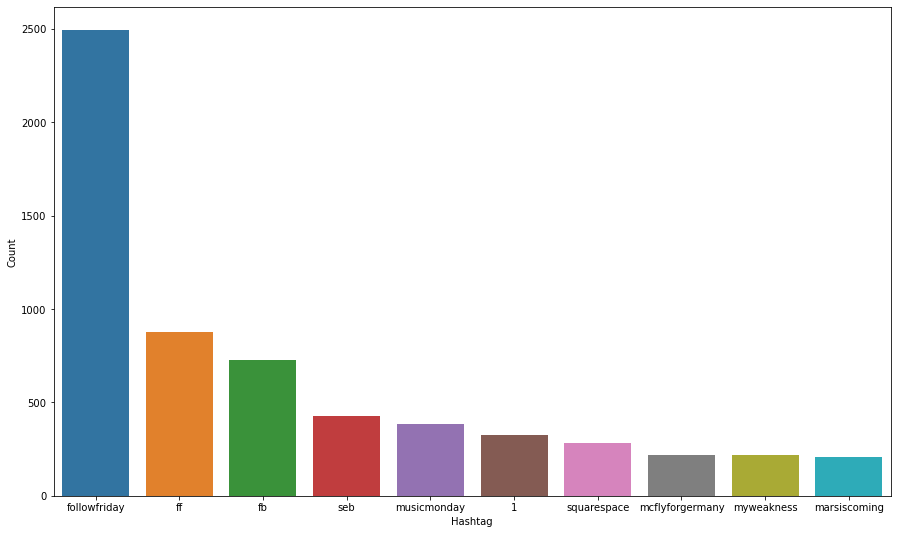

In [45]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [46]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

Hashtag  Count
0          itm      2
1  therapyfail      1
2           fb   1059
3         ttsc      1
4           24     11

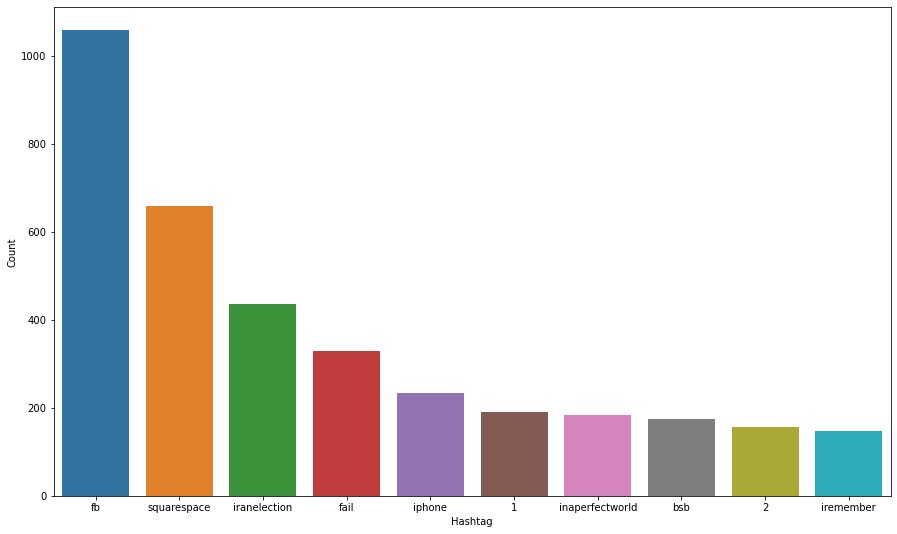

In [47]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [48]:
#from sklearn.feature_extraction.text import CountVectorizer
#bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
#bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [50]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(bow, df['sentiment'], random_state=42, test_size=0.25)

In [51]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import f1_score, accuracy_score
#model = LogisticRegression()
#model.fit(x_train, y_train)
#pred = model.predict(x_test)
#f1_score(y_test, pred)

0.749796830315997

In [52]:
#accuracy_score(y_test,pred)

0.7359975

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.10, random_state = 2)

In [63]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [64]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [65]:
def model_Evaluate(model):
    
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':10}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':10}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':15}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.75      0.78     80004
           1       0.77      0.81      0.79     79996

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



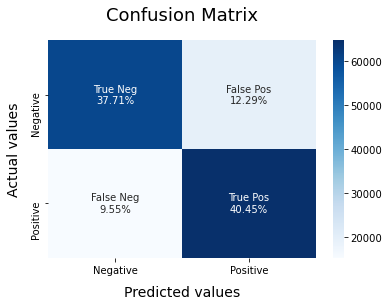

In [66]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
acc_BNB= model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     80004
           1       0.79      0.81      0.80     79996

    accuracy                           0.79    160000
   macro avg       0.80      0.79      0.79    160000
weighted avg       0.80      0.79      0.79    160000



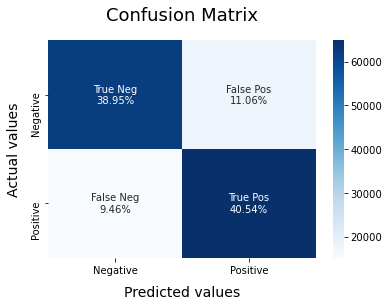

In [77]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
acc_LR= model_Evaluate(LRmodel)

In [78]:
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()
file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [88]:
def load_models():
    
    file = open('vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    file = open('Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):

    textdata = vectoriser.transform(clean_dataset(text))
    sentiment = model.predict(textdata)
    

    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
  
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
  
    text = ["Ankara uni sent three messages in one day, legal persons are more loyal than real persons",
            "I'm living my life alone, I'm going to Adana, Kazım, to drink milkshake from the buffet.",
            "I think you are a depressive person",
           "I loved you despite you"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                                                text sentiment
0  Ankara uni sent three messages in one day, leg...  Positive
1   I'm living my life alone, I'm going to Adana,...  Positive
2                I think you are a depressive person  Negative
3                            I loved you despite you  Positive
